In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('..//real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
2,Julianowo,szczycieński,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
3,Nadarzyn,pruszkowski,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
4,Rusiec,pruszkowski,52.065800,20.803900,1160.0,brak,utwardzana,brak,brak,brak,brak,255200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,Cholerzyn,krakowski,50.058603,19.773954,1670.0,brak,polna,brak,brak,brak,brak,333000.0
7486,Mogilany,krakowski,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7487,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7488,Czernichów,krakowski,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            7490 non-null   object 
 1   district        7490 non-null   object 
 2   localization_y  7490 non-null   float64
 3   localization_x  7490 non-null   float64
 4   area            7490 non-null   float64
 5   sewers          7490 non-null   object 
 6   road            7490 non-null   object 
 7   fence           7490 non-null   object 
 8   water           7490 non-null   object 
 9   electricity     7490 non-null   object 
 10  gas             7490 non-null   object 
 11  price           7490 non-null   float64
dtypes: float64(4), object(8)
memory usage: 702.3+ KB


## creating dummy variables

In [5]:
dummies = pd.get_dummies(frame[['sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   city                                     7490 non-null   object 
 1   district                                 7490 non-null   object 
 2   localization_y                           7490 non-null   float64
 3   localization_x                           7490 non-null   float64
 4   area                                     7490 non-null   float64
 5   price                                    7490 non-null   float64
 6   sewers_miejska                           7490 non-null   uint8  
 7   sewers_przydomowa oczyszczalnia ścieków  7490 non-null   uint8  
 8   sewers_szambo                            7490 non-null   uint8  
 9   road_polna                               7490 non-null   uint8  
 10  road_utwardzana                          7490 no


#### adjustments for better training

In [7]:
frame = frame.drop(['water_wodociąg na działce','water_wodociąg w drodze','water_własne ujęcie/studnia',
                    'electricity_na działce','electricity_w drodze','gas_na działce','gas_w drodze',
                    'sewers_miejska','sewers_przydomowa oczyszczalnia ścieków','sewers_szambo'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             7490 non-null   object 
 1   district         7490 non-null   object 
 2   localization_y   7490 non-null   float64
 3   localization_x   7490 non-null   float64
 4   area             7490 non-null   float64
 5   price            7490 non-null   float64
 6   road_polna       7490 non-null   uint8  
 7   road_utwardzana  7490 non-null   uint8  
 8   fence_inne       7490 non-null   uint8  
 9   fence_metalowe   7490 non-null   uint8  
 10  fence_mieszane   7490 non-null   uint8  
 11  fence_siatka     7490 non-null   uint8  
dtypes: float64(4), object(2), uint8(6)
memory usage: 395.1+ KB


In [9]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7490.0,3246.751435,6150.670751,250.0,1062.25,1532.0,2970.0,97003.0
price,7490.0,488738.182216,858096.456476,20000.0,114000.00,210000.0,469750.0,10000000.0


##### price

In [10]:
frame.sort_values('price').head(50)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka
3651,Sulkowo,pułtuski,52.686932,20.815469,654.0,20000.0,1,0,0,0,0,0
6275,Żmijowiska,lubaczowski,50.025900,23.195300,953.0,20000.0,0,0,0,0,0,0
48,Wąsowo,nowotomyski,52.348380,16.246280,805.0,20125.0,0,1,0,0,0,0
5823,Sławków,będziński,50.300960,19.389138,419.0,21000.0,1,0,0,0,0,0
4510,Jasienica Rosielna,brzozowski,49.752892,21.946002,710.0,21300.0,1,0,0,0,0,0
6360,Naramice,wieluński,51.296364,18.430445,2155.0,22000.0,0,0,0,0,0,0
628,Dobrzyń,krośnieński,51.916021,14.781118,852.0,23004.0,1,0,0,0,0,0
6291,Borki Lipkowskie,poddębicki,51.853000,18.880800,1062.0,23364.0,1,0,0,0,0,0
980,Brzezie k. Sulechowa,zielonogórski,52.100835,15.598120,1382.0,23400.0,1,0,0,0,0,0
3477,Dominowo,średzki,52.290133,17.360404,679.0,23765.0,1,0,0,0,0,0


In [11]:
frame.sort_values('price',ascending=False).head(50)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka
1645,Gdańsk,Rębiechowo,54.355094,18.510436,50000.0,10000000.0,0,1,0,0,0,0
7326,Warszawa,Czerniaków,52.204722,21.050556,6774.0,10000000.0,1,0,0,0,0,0
950,Poznań,Smochowice,52.439430,16.808079,20000.0,10000000.0,1,0,0,0,0,0
1489,Warszawa,Wawer,52.219444,21.135556,20000.0,10000000.0,0,1,0,0,0,0
3934,Warszawa,Ursynów,52.149167,21.044167,33384.0,9900000.0,0,0,0,0,0,0
6454,Warszawa,Wilanów,52.174167,21.080278,7377.0,9590100.0,0,0,0,0,0,0
7210,Żółwin,pruszkowski,52.106761,20.725973,45200.0,9040000.0,0,0,0,0,0,0
2669,Warszawa,Zawady,52.171944,21.107778,8785.0,8690000.0,1,0,0,0,0,0
4448,Szklarska Poręba,jeleniogórski,50.828732,15.520128,11550.0,8600000.0,1,0,0,0,0,0
2010,Warszawa,Wilanów,52.174167,21.080278,9642.0,8500000.0,1,0,0,0,0,0


In [12]:
len(frame[frame['price']<20000])

0

In [13]:
len(frame[frame['price']>10000000])

0

In [14]:
frame.drop(frame[frame['price']<20000].index,inplace=True)

In [15]:
frame.drop(frame[frame['price']>10000000].index,inplace=True)

##### area

In [16]:
frame.sort_values('area').head(50)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka
1828,Swarzędz,poznański,52.407595,17.073506,250.0,280000.0,1,0,0,0,0,0
4292,Mierzyn,policki,53.429123,14.465905,275.0,85000.0,1,0,0,0,0,0
1825,Biedrusko,poznański,52.538319,16.941200,278.0,150000.0,1,0,0,0,0,0
1584,Białystok,Wygoda,53.146667,23.193611,290.0,149000.0,0,0,0,0,0,1
4449,Białystok,Wygoda,53.146667,23.193611,290.0,155000.0,1,0,0,0,0,0
5069,Pcim,myślenicki,49.752607,19.970220,300.0,51950.0,0,0,0,0,0,0
5209,Kraków,Prądnik Czerwony,50.088777,19.968286,300.0,520000.0,0,0,0,0,0,0
2531,Gdynia,Leszczynki,54.531401,18.483901,346.0,349000.0,1,0,0,0,0,0
4538,Konin,wielkopolskie,52.238418,18.205970,346.0,50000.0,0,0,0,0,0,0
2942,Kraków,Krowodrza,50.072500,19.918611,350.0,260000.0,0,0,0,0,0,0


In [17]:
frame.sort_values('area',ascending=False).head(50)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka
3826,Chełm,lubelskie,51.132959,23.474677,97003.0,4292700.0,0,0,0,0,0,0
5740,Olsztyn,warmińsko-mazurskie,53.802536,20.416226,90199.0,3300000.0,1,0,0,0,0,0
3428,Radziejowice,żyrardowski,52.005438,20.553363,88200.0,2500000.0,0,0,0,0,0,0
2714,Świdnica,zielonogórski,51.887900,15.389400,87787.0,1316805.0,1,0,0,0,0,0
1485,Żarnowska,lęborski,54.723630,17.530935,84100.0,3364000.0,1,0,0,0,0,0
3611,Rosnowo,poznański,52.326748,16.785382,78870.0,7887000.0,1,0,0,0,0,0
2888,Brzoskwinia,krakowski,50.093501,19.715991,78500.0,2750000.0,0,0,0,0,0,0
231,Cholewy,warszawski zachodni,52.220568,20.491449,77750.0,2177000.0,0,1,0,0,0,0
3153,Niekanin,kołobrzeski,54.155979,15.611663,77700.0,4662000.0,1,0,0,0,0,0
5750,Budy Gutarzewskie,płoński,52.718363,20.456718,75000.0,1490000.0,0,1,0,0,0,1


In [18]:
len(frame[frame['area']<250])

0

In [19]:
len(frame[frame['area']>100000])

0

In [20]:
frame.drop(frame[frame['area']<250].index,inplace=True)

In [21]:
frame.drop(frame[frame['area']>100000].index,inplace=True)

In [22]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7490.0,3246.751435,6150.670751,250.0,1062.25,1532.0,2970.0,97003.0
price,7490.0,488738.182216,858096.456476,20000.0,114000.00,210000.0,469750.0,10000000.0


### price of $m^{2}$

In [23]:
frame['price_of_sqm'] = frame['price']/frame['area']

In [24]:
frame.describe().transpose().loc[['area','price','price_of_sqm']]

,count,mean,std,min,25%,50%,75%,max
area,7490.0,3246.751435,6150.670751,250.0,1062.250000,1532.0,2970.00000,9.700300e+04
price,7490.0,488738.182216,858096.456476,20000.0,114000.000000,210000.0,469750.00000,1.000000e+07
price_of_sqm,7490.0,206.673229,258.587088,10.0,65.059558,120.0,235.05597,2.488938e+03


In [25]:
frame.sort_values('price_of_sqm').head(50)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka,price_of_sqm
2771,Ołpiny,tarnowski,49.806686,21.203643,2800.0,28000.0,1,0,0,0,0,0,10.000000
3115,Lamkowo,olsztyński,53.917240,20.687430,6596.0,65960.0,0,1,0,0,0,0,10.000000
6437,Darżkowo,bytowski,54.275705,17.178556,18000.0,180000.0,0,0,0,0,0,0,10.000000
4850,Nowa Karczma,kościerski,54.133113,18.203673,47200.0,472000.0,1,0,0,0,0,0,10.000000
2871,Tuligłowy,jarosławski,49.890804,22.600996,6000.0,60000.0,0,0,0,0,0,0,10.000000
2222,Krościenko,bieszczadzki,49.475755,22.668388,48000.0,485000.0,0,0,0,0,0,0,10.104167
2238,Kamienica Szlachecka,kartuski,54.269466,17.950185,25632.0,259000.0,1,0,0,0,0,0,10.104557
6360,Naramice,wieluński,51.296364,18.430445,2155.0,22000.0,0,0,0,0,0,0,10.208817
6670,Gidle,radomszczański,50.958876,19.480060,5800.0,60000.0,0,0,0,0,0,0,10.344828
2274,Ludwinów,chełmski,51.095354,23.376416,7625.0,79000.0,0,0,0,0,0,0,10.360656


In [26]:
frame.sort_values('price_of_sqm',ascending=False).head(100)

,city,district,localization_y,localization_x,area,price,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka,price_of_sqm
2417,Wrocław,Borek,51.081389,17.012222,904.0,2250000.0,1,0,0,0,0,0,2488.938053
164,Warszawa,Wilanów,52.173925,21.078611,1001.0,2450000.0,0,0,1,0,0,0,2447.552448
5981,Kraków,Olsza,50.076100,19.962600,564.0,1370000.0,0,0,0,0,0,0,2429.078014
803,Wrocław,Biskupin,51.102778,17.100833,2137.0,4900000.0,0,0,0,0,0,0,2292.934020
818,Wrocław,Śródmieście,51.100634,17.099809,2137.0,4900000.0,0,0,0,0,0,0,2292.934020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,Konstancin-Jeziorna,piaseczyński,52.092927,21.119394,2572.0,3200000.0,0,0,0,0,0,0,1244.167963
3633,Wołomin,wołomiński,52.345472,21.238940,604.0,750000.0,0,0,0,0,0,0,1241.721854
5615,Poznań,wielkopolskie,52.404581,16.948905,526.0,648000.0,0,0,1,0,0,0,1231.939163
2147,Piastów,pruszkowski,52.183330,20.850000,1710.0,2100000.0,0,0,0,0,0,0,1228.070175


In [27]:
len(frame[frame['price_of_sqm']<10])

0

In [28]:
len(frame[frame['price_of_sqm']>1000])

177

In [29]:
frame.drop(frame[frame['price_of_sqm']<10].index,inplace=True)

In [30]:
frame.drop(frame[frame['price_of_sqm']>1000].index,inplace=True)

In [31]:
frame.describe().transpose().loc[['area','price','price_of_sqm']]

,count,mean,std,min,25%,50%,75%,max
area,7313.0,3292.000034,6215.413627,275.0,1080.0,1555.000000,3000.0,97003.0
price,7313.0,455242.237768,808807.655849,20000.0,110000.0,202000.000000,438000.0,10000000.0
price_of_sqm,7313.0,178.096861,175.616316,10.0,65.0,115.346038,220.0,1000.0


In [32]:
frame.drop(['price','area'],axis=1,inplace=True)

In [33]:
frame.reset_index(drop=True, inplace=True)

In [34]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             7313 non-null   object 
 1   district         7313 non-null   object 
 2   localization_y   7313 non-null   float64
 3   localization_x   7313 non-null   float64
 4   road_polna       7313 non-null   uint8  
 5   road_utwardzana  7313 non-null   uint8  
 6   fence_inne       7313 non-null   uint8  
 7   fence_metalowe   7313 non-null   uint8  
 8   fence_mieszane   7313 non-null   uint8  
 9   fence_siatka     7313 non-null   uint8  
 10  price_of_sqm     7313 non-null   float64
dtypes: float64(3), object(2), uint8(6)
memory usage: 328.6+ KB


## geographic coordinate encoding

In [35]:
y_min = frame['localization_y'].min()
print(y_min)

49.199733


In [36]:
y_max = frame['localization_y'].max()
print(y_max)

54.83128000000001


In [37]:
x_min = frame['localization_x'].min()
print(x_min)

14.33805556


In [38]:
x_max = frame['localization_x'].max()
print(x_max)

23.867698


In [39]:
buckets = 400

In [40]:
y_bucket = (y_max - y_min) / buckets
print(y_bucket)

0.014078867500000012


In [41]:
x_bucket = (x_max - x_min) / buckets
print(x_bucket)

0.0238241061


In [42]:
import cartopy

<GeoAxesSubplot:title={'center':'Map with 400x400 coordinate buckets'}, xlabel='localization_x', ylabel='localization_y'>

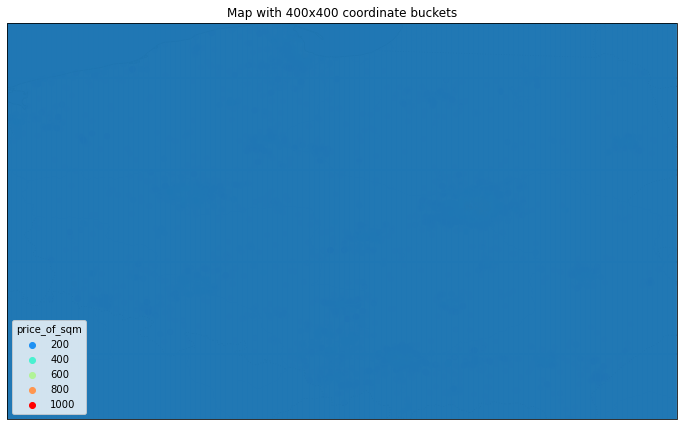

In [43]:
plt.figure(figsize=(12,12))

ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)


plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title(f'Map with {buckets}x{buckets} coordinate buckets')

for i in range(buckets):
    plt.axvline(x = x_min + i * x_bucket)
    
for i in range(buckets):
    plt.axhline(y = y_min + i * y_bucket)
    

sns.scatterplot(x='localization_x', y='localization_y',
                data=frame, hue='price_of_sqm',
                palette='rainbow', edgecolor=None,alpha=0.2)

In [44]:
# frame['y'] = (frame['localization_y'] - y_min)/y_bucket

In [45]:
# frame['x'] = (frame['localization_x'] - x_min)/x_bucket

In [46]:
# frame['geo_bucket'] = [f'y{frame["y"].iloc[row]}_x{frame["x"].iloc[row]}' for row in frame.index]

In [47]:
buc = buckets

In [48]:
latbins = pd.cut(frame.localization_y, buc, labels=[f'lat{k}' for k in range(1,buc+1)], retbins=True)
longbins = pd.cut(frame.localization_x, buc, labels=[f'long{k}' for k in range(1,buc+1)], retbins=True)

frame['geo_bucket'] = [f'{latbins[0][row]}_{longbins[0][row]}' for row in frame.index]

In [49]:
frame['geo_bucket']

0       lat188_long204
1       lat185_long204
2       lat322_long275
3       lat206_long272
4       lat204_long272
             ...      
7308     lat62_long229
7309     lat53_long234
7310     lat59_long226
7311     lat56_long225
7312     lat56_long225
Name: geo_bucket, Length: 7313, dtype: object

In [50]:
frame['geo_bucket'].value_counts()

lat208_long266    65
lat206_long272    48
lat206_long285    31
lat207_long269    30
lat222_long285    26
                  ..
lat29_long305      1
lat120_long257     1
lat138_long385     1
lat367_long172     1
lat72_long278      1
Name: geo_bucket, Length: 3574, dtype: int64

In [51]:
frame['geo_bucket'].nunique()

3574

In [52]:
dummies2 = pd.get_dummies(frame['geo_bucket'],drop_first=True)
frame = frame.drop('geo_bucket',axis=1)
frame = pd.concat([frame,dummies2],axis=1)

In [53]:
frame

,city,district,localization_y,localization_x,road_polna,road_utwardzana,fence_inne,fence_metalowe,fence_mieszane,fence_siatka,...,lat96_long214,lat96_long373,lat97_long191,lat97_long210,lat97_long220,lat98_long180,lat99_long176,lat9_long231,lat9_long237,lat9_long244
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Julianowo,szczycieński,53.723500,20.867400,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nadarzyn,pruszkowski,52.094000,20.807400,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rusiec,pruszkowski,52.065800,20.803900,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,Cholerzyn,krakowski,50.058603,19.773954,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7309,Mogilany,krakowski,49.939618,19.889479,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7310,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7311,Czernichów,krakowski,49.987773,19.679529,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
frame = frame.drop(['localization_y','localization_x','city','district'],axis=1)

In [55]:
frame.columns

Index(['road_polna', 'road_utwardzana', 'fence_inne', 'fence_metalowe',
       'fence_mieszane', 'fence_siatka', 'price_of_sqm', 'lat100_long105',
       'lat100_long203', 'lat101_long204',
       ...
       'lat96_long214', 'lat96_long373', 'lat97_long191', 'lat97_long210',
       'lat97_long220', 'lat98_long180', 'lat99_long176', 'lat9_long231',
       'lat9_long237', 'lat9_long244'],
      dtype='object', length=3580)

## train test split

In [56]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame['price_of_sqm'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
X_train= scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(5484, 3579)

In [64]:
X_test.shape

(1829, 3579)

## creating model 

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [66]:
model = Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [67]:
# model.summary()

In [68]:
# from tensorflow.keras.callbacks import EarlyStopping

In [69]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [70]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=500,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5484 samples, validate on 1829 samples
Epoch 1/500
5484/5484 [==============================] - 1s 128us/sample - loss: 61899.8764 - val_loss: 63911.2654
Epoch 2/500
5484/5484 [==============================] - 0s 41us/sample - loss: 61330.3332 - val_loss: 62887.8557
Epoch 3/500
5484/5484 [==============================] - 0s 38us/sample - loss: 59620.5951 - val_loss: 60285.3995
Epoch 4/500
5484/5484 [==============================] - 0s 38us/sample - loss: 55909.0796 - val_loss: 55394.8084
Epoch 5/500
5484/5484 [==============================] - 0s 39us/sample - loss: 49752.0595 - val_loss: 48172.3141
Epoch 6/500
5484/5484 [==============================] - 0s 38us/sample - loss: 41855.4156 - val_loss: 40106.5440
Epoch 7/500
5484/5484 [==============================] - 0s 37us/sample - loss: 34495.1072 - val_loss: 33991.5373
Epoch 8/500
5484/5484 [==============================] - 0s 37us/sample - loss: 29960.4723 - val_loss: 31098.1382
Epoch 9/500
5484/5484 [================

5484/5484 [==============================] - 0s 59us/sample - loss: 4117.5110 - val_loss: 18978.5425
Epoch 73/500
5484/5484 [==============================] - 0s 51us/sample - loss: 4094.8261 - val_loss: 18852.5464
Epoch 74/500
5484/5484 [==============================] - 0s 51us/sample - loss: 4066.6611 - val_loss: 18818.3924
Epoch 75/500
5484/5484 [==============================] - 0s 50us/sample - loss: 4053.4082 - val_loss: 18669.6990
Epoch 76/500
5484/5484 [==============================] - 0s 51us/sample - loss: 4040.6571 - val_loss: 18734.0167
Epoch 77/500
5484/5484 [==============================] - 0s 49us/sample - loss: 4031.5900 - val_loss: 18697.0616
Epoch 78/500
5484/5484 [==============================] - 0s 50us/sample - loss: 4009.6516 - val_loss: 18861.7661
Epoch 79/500
5484/5484 [==============================] - 0s 50us/sample - loss: 3987.9754 - val_loss: 18775.2728
Epoch 80/500
5484/5484 [==============================] - 0s 48us/sample - loss: 3971.9081 - val_loss

5484/5484 [==============================] - 0s 50us/sample - loss: 3422.6403 - val_loss: 19106.5986
Epoch 144/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3406.7876 - val_loss: 18811.1170
Epoch 145/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3409.7227 - val_loss: 18726.6197
Epoch 146/500
5484/5484 [==============================] - 0s 50us/sample - loss: 3412.4501 - val_loss: 18877.4344
Epoch 147/500
5484/5484 [==============================] - 0s 51us/sample - loss: 3400.9939 - val_loss: 18995.3648
Epoch 148/500
5484/5484 [==============================] - 0s 50us/sample - loss: 3398.7020 - val_loss: 18568.5667
Epoch 149/500
5484/5484 [==============================] - 0s 50us/sample - loss: 3387.2441 - val_loss: 19261.4343
Epoch 150/500
5484/5484 [==============================] - 0s 53us/sample - loss: 3395.0093 - val_loss: 19027.4294
Epoch 151/500
5484/5484 [==============================] - 0s 53us/sample - loss: 3379.1428 - 

5484/5484 [==============================] - 0s 50us/sample - loss: 3120.0428 - val_loss: 19093.8608
Epoch 215/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3119.7053 - val_loss: 19255.7598
Epoch 216/500
5484/5484 [==============================] - 0s 48us/sample - loss: 3128.6704 - val_loss: 18850.8022
Epoch 217/500
5484/5484 [==============================] - 0s 48us/sample - loss: 3139.8450 - val_loss: 18933.6014
Epoch 218/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3118.7210 - val_loss: 19246.3454
Epoch 219/500
5484/5484 [==============================] - 0s 50us/sample - loss: 3106.2216 - val_loss: 19085.7850
Epoch 220/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3104.0955 - val_loss: 19296.6504
Epoch 221/500
5484/5484 [==============================] - 0s 49us/sample - loss: 3100.6198 - val_loss: 19050.8725
Epoch 222/500
5484/5484 [==============================] - 0s 51us/sample - loss: 3103.6949 - 

5484/5484 [==============================] - 0s 51us/sample - loss: 2955.5478 - val_loss: 19183.6570
Epoch 286/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2951.1346 - val_loss: 18992.6054
Epoch 287/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2977.2274 - val_loss: 19136.6343
Epoch 288/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2956.2762 - val_loss: 19374.4380
Epoch 289/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2943.9408 - val_loss: 19231.1935
Epoch 290/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2954.2473 - val_loss: 19506.6050
Epoch 291/500
5484/5484 [==============================] - 0s 52us/sample - loss: 2943.0657 - val_loss: 19350.7729
Epoch 292/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2941.4860 - val_loss: 19282.6706
Epoch 293/500
5484/5484 [==============================] - 0s 53us/sample - loss: 2936.0052 - 

5484/5484 [==============================] - 0s 52us/sample - loss: 2829.5220 - val_loss: 19228.1000
Epoch 357/500
5484/5484 [==============================] - 0s 50us/sample - loss: 2835.4800 - val_loss: 19290.9866
Epoch 358/500
5484/5484 [==============================] - 0s 50us/sample - loss: 2837.3847 - val_loss: 19497.3784
Epoch 359/500
5484/5484 [==============================] - 0s 49us/sample - loss: 2837.5572 - val_loss: 19449.7340
Epoch 360/500
5484/5484 [==============================] - 0s 50us/sample - loss: 2841.0341 - val_loss: 19542.5670
Epoch 361/500
5484/5484 [==============================] - 0s 51us/sample - loss: 2822.6489 - val_loss: 19342.5384
Epoch 362/500
5484/5484 [==============================] - 0s 49us/sample - loss: 2818.8513 - val_loss: 19282.0309
Epoch 363/500
5484/5484 [==============================] - 0s 49us/sample - loss: 2823.1097 - val_loss: 19365.9747
Epoch 364/500
5484/5484 [==============================] - 0s 49us/sample - loss: 2812.7055 - 

5484/5484 [==============================] - 0s 60us/sample - loss: 2748.2888 - val_loss: 19538.0655
Epoch 428/500
5484/5484 [==============================] - 0s 61us/sample - loss: 2754.9848 - val_loss: 19385.8405
Epoch 429/500
5484/5484 [==============================] - 0s 61us/sample - loss: 2736.4559 - val_loss: 19454.3263
Epoch 430/500
5484/5484 [==============================] - 0s 63us/sample - loss: 2736.5012 - val_loss: 19359.3410
Epoch 431/500
5484/5484 [==============================] - 0s 60us/sample - loss: 2734.6008 - val_loss: 19428.6849
Epoch 432/500
5484/5484 [==============================] - 0s 57us/sample - loss: 2721.6302 - val_loss: 19787.5828
Epoch 433/500
5484/5484 [==============================] - 0s 59us/sample - loss: 2736.6221 - val_loss: 19393.5059
Epoch 434/500
5484/5484 [==============================] - 0s 59us/sample - loss: 2734.5369 - val_loss: 19429.8980
Epoch 435/500
5484/5484 [==============================] - 0s 61us/sample - loss: 2742.1825 - 

5484/5484 [==============================] - 0s 50us/sample - loss: 2663.2803 - val_loss: 19529.0231
Epoch 499/500
5484/5484 [==============================] - 0s 50us/sample - loss: 2660.1493 - val_loss: 19416.1229
Epoch 500/500
5484/5484 [==============================] - 0s 49us/sample - loss: 2654.8052 - val_loss: 19405.3218

 2.0 min.


In [71]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

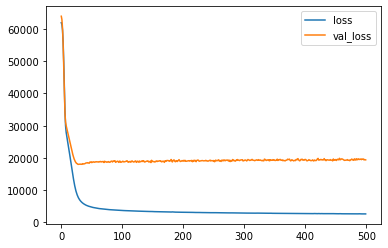

In [72]:
losses.plot()
# plt.ylim(0,20000000000)

## model ewaluation

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [74]:
predictions = model.predict(X_test)

In [75]:
mean_absolute_error(y_test,predictions)

94.54079342803821

In [76]:
np.sqrt(mean_squared_error(y_test,predictions))

139.30298563712412

In [77]:
explained_variance_score(y_test,predictions)

0.40378030387256014

In [78]:
frame['price_of_sqm'].mean()

178.0968614347122

In [79]:
frame['price_of_sqm'].median()

115.34603811434303

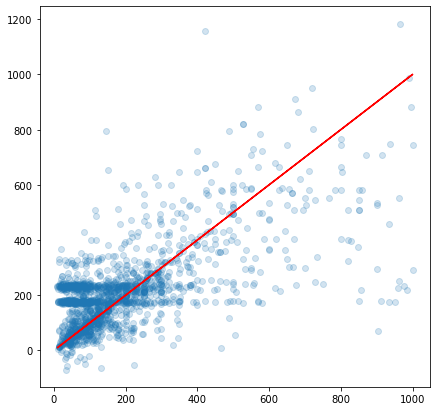

In [80]:
plt.figure(figsize=(7,7))
# plt.xlim(0,3000000)
# plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [81]:
errors = y_test.reshape(1829, 1) - predictions

<AxesSubplot:ylabel='Count'>

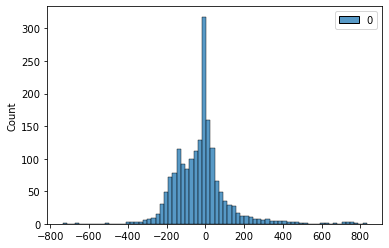

In [82]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [83]:
predictions

array([[179.09883],
       [299.08707],
       [176.3231 ],
       ...,
       [586.245  ],
       [149.54584],
       [171.81744]], dtype=float32)

In [84]:
y_test

array([ 60.54490414, 698.92473118, 190.        , ..., 654.54545455,
       125.        , 160.        ])

In [85]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([ 2.95811569,  0.42792457,  0.92801634,  2.47508957,  1.01297021,
        0.84759775,  0.9862422 ,  0.88937397,  1.02504025,  0.6353471 ,
        0.67220531,  1.22530602,  0.77037241,  2.03016052,  1.21874012,
        1.3301535 ,  5.92611299,  1.4881636 ,  0.67321529, -0.20238307])

## saving data

In [86]:
# outfile = open('real_estate_data_frame_improved','wb')
# pkl.dump(frame,outfile)
# outfile.close()

In [87]:
# from datetime import datetime
# from tensorflow.keras.models import load_model
# timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
# model.save('models_ann\\' + timestamp)

In [88]:
# import joblib
# joblib.dump(scaler, 'scaler')